### Dataimport, cleaning and overview

In [65]:

# Datahandling

!pip install wordcloud

import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud




In [66]:
# Data import: 
data = pd.read_csv('detection_data.csv')

In [67]:
data.head()

User ID        Username                                              Tweet  \
0   132131           flong  Station activity person against natural majori...   
1   289683  hinesstephanie  Authority research natural life material staff...   
2   779715      roberttran  Manage whose quickly especially foot none to g...   
3   696168          pmason  Just cover eight opportunity strong policy which.   
4   704441          noah87                      Animal sign six data good or.   

   Retweet Count  Mention Count  Follower Count  Verified  Bot Label  \
0             85              1            2353     False          1   
1             55              5            9617      True          0   
2              6              2            4363      True          0   
3             54              5            2242      True          1   
4             26              3            8438     False          1   

       Location           Created At            Hashtags  
0     Adkinston  2020-05-11 15:29:50                 NaN  
1    Sanderston  2022-11-26 05:18:10           both live  
2  Harrisonfurt  2022-08-08 03:16:54         phone ahead  
3  Martinezberg  2021-08-14 22:27:05  ever quickly new I  
4  Camachoville  2020-04-13 21:24:21     foreign mention

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [69]:
data.isna().sum()


User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64

In [70]:
# Hashtags contains NaN values, but they should not be removed, as the row can still be used for analysis, even though it doesnt contain a hashtag
#Display the shape of the DataFrame before filling NaN values
print("Shape before filling NaN values:", data.shape)

# Check for missing values in the DataFrame
missing_values = data[data.isnull().any(axis=1)]

# Display rows with missing values, if any
if not missing_values.empty:
    print("Rows with missing values:")
    print(missing_values)
else:
    print("No missing values found.")

# Fill NaN values in the 'Hashtags' column with 0 so all rows remain. Rows without hashtags can still be used
data['Hashtags'] = data['Hashtags'].fillna(0)

# Display the shape of the DataFrame after filling NaN values
print("Shape after filling NaN values:", data.shape)


Shape before filling NaN values: (50000, 11)
Rows with missing values:
       User ID            Username  \
0       132131               flong   
8       549888      kimberlymorris   
10      576805        hicksanthony   
12      383629               rcruz   
20      463487  hernandezchristian   
...        ...                 ...   
49963   816692               kryan   
49968   425860               wmoss   
49988   279336           smithjohn   
49990   312961         princeanita   
49992   203037          phamedward   

                                                   Tweet  Retweet Count  \
0      Station activity person against natural majori...             85   
8                     Eye rest prove mission show floor.             25   
10        Through both practice point fear billion deep.             57   
12      Recognize nor choose over trade another involve.             60   
20     Part admit the choice across some data edge ag...             26   
...                   

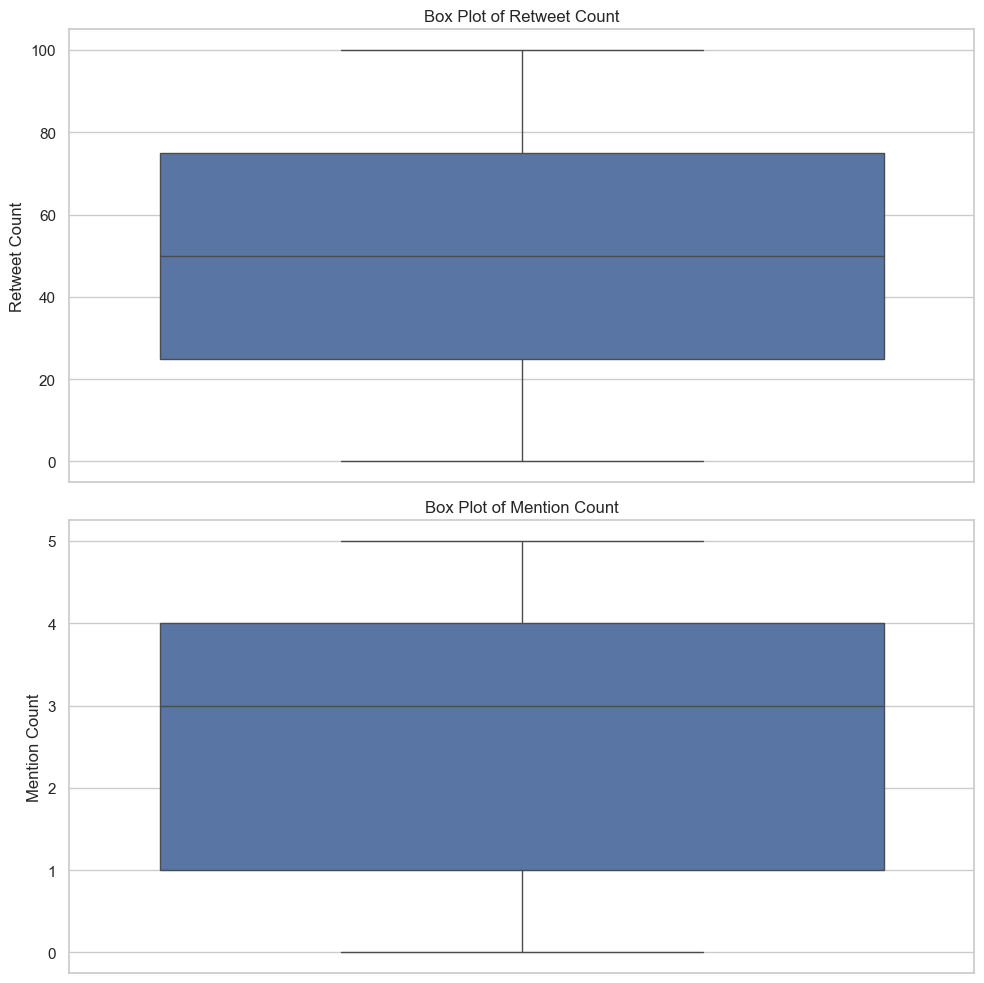

Summary statistics - Retweet Count:
count    50000.00000
mean        50.00560
std         29.18116
min          0.00000
25%         25.00000
50%         50.00000
75%         75.00000
max        100.00000
Name: Retweet Count, dtype: float64

Summary statistics - Mention Count:
count    50000.000000
mean         2.513760
std          1.708563
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Mention Count, dtype: float64


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Check for outliers
# Step 1: Create a figure with two rows and one column for box plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Step 2: Boxplot for Retweet Count
sns.boxplot(data=data, y='Retweet Count', ax=ax1)
ax1.set_title('Box Plot of Retweet Count')
ax1.set_ylabel('Retweet Count')

# Step 3: Boxplot for Mention Count
sns.boxplot(data=data, y='Mention Count', ax=ax2)
ax2.set_title('Box Plot of Mention Count')
ax2.set_ylabel('Mention Count')

# Step 4: Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Step 5: Print summary statistics for both columns
print("Summary statistics - Retweet Count:")
print(data['Retweet Count'].describe())  # Statistics for Retweet Count

print("\nSummary statistics - Mention Count:")
print(data['Mention Count'].describe())  # Statistics for Mention Count


### Descriptive statistics

In [72]:
# Basic descriptive statistics for numerical columns
numerical_stats = data_cleaned.describe()
print("Basic Descriptive Statistics for Numerical Columns:")
print(numerical_stats)


Basic Descriptive Statistics for Numerical Columns:
             User ID  Retweet Count  Mention Count  Follower Count  \
count   41659.000000   41659.000000   41659.000000    41659.000000   
mean   548640.613097      49.950911       2.515207     4990.867928   
std    259990.806985      29.195286       1.709249     2880.947193   
min    100025.000000       0.000000       0.000000        0.000000   
25%    321829.500000      25.000000       1.000000     2493.500000   
50%    548396.000000      50.000000       3.000000     4997.000000   
75%    772751.500000      75.000000       4.000000     7475.500000   
max    999995.000000     100.000000       5.000000    10000.000000   

          Bot Label  
count  41659.000000  
mean       0.500204  
std        0.500006  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


In [73]:
# Descriptive statistics for categorical columns
categorical_stats = data_cleaned.describe(include=['object'])
print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_stats)



Descriptive Statistics for Categorical Columns:
       Username                                              Tweet  \
count     41659                                              41659   
unique    34700                                              41659   
top      ksmith  Authority research natural life material staff...   
freq         18                                                  1   

            Location           Created At Hashtags  
count          41659                41659    41659  
unique         22333                41652    34247  
top     Lake Michael  2020-11-21 14:03:59     area  
freq              37                    2       21  


In [74]:
# Summary of specific columns
summary_columns = data_cleaned[['Retweet Count', 'Follower Count', 'Mention Count']].describe()
print("\nSummary of Specific Columns (Retweet Count, Follower Count, Mention Count):")
print(summary_columns)



Summary of Specific Columns (Retweet Count, Follower Count, Mention Count):
       Retweet Count  Follower Count  Mention Count
count   41659.000000    41659.000000   41659.000000
mean       49.950911     4990.867928       2.515207
std        29.195286     2880.947193       1.709249
min         0.000000        0.000000       0.000000
25%        25.000000     2493.500000       1.000000
50%        50.000000     4997.000000       3.000000
75%        75.000000     7475.500000       4.000000
max       100.000000    10000.000000       5.000000


In [75]:
# Count of unique values in each column
unique_counts = data_cleaned.nunique()
print("\nCount of Unique Values in Each Column:")
print(unique_counts)



Count of Unique Values in Each Column:
User ID           41659
Username          34700
Tweet             41659
Retweet Count       101
Mention Count         6
Follower Count     9830
Verified              2
Bot Label             2
Location          22333
Created At        41652
Hashtags          34247
dtype: int64


# Exploratory Data Analysis (EDA) 

### Superficial Analysis and Bot Vs. Human Profile behaviour

/var/folders/xc/v1l81vkx6fjc9wpqc0tsnl400000gn/T/ipykernel_15371/2456212964.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/xc/v1l81vkx6fjc9wpqc0tsnl400000gn/T/ipykernel_15371/2456212964.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/xc/v1l81vkx6fjc9wpqc0tsnl400000gn/T/ipykernel_15371/2456212964.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



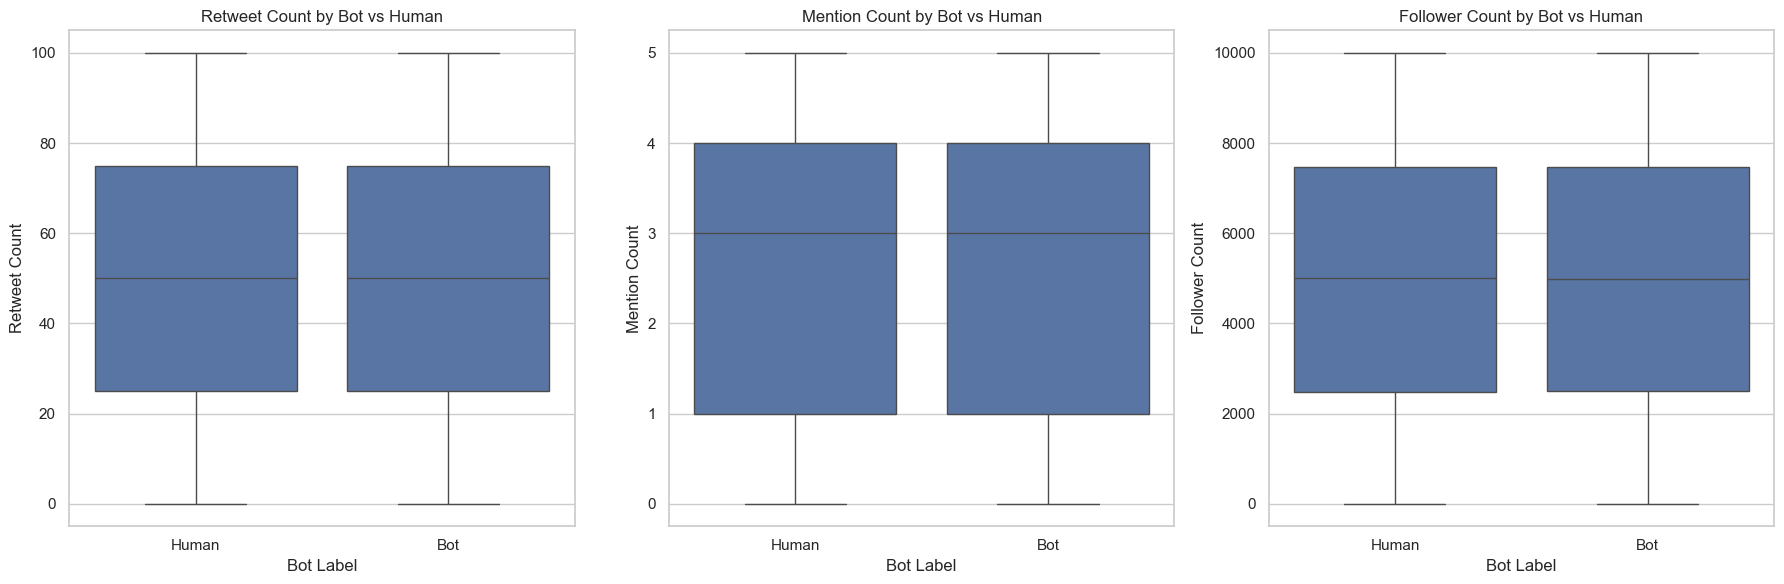

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation (replace this with your actual DataFrame)
# data = pd.read_csv('your_data.csv')  # Load your data here


# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Retweet Count
sns.boxplot(x='Bot Label', y='Retweet Count', data=data, ax=axes[0])
axes[0].set_title('Retweet Count by Bot vs Human')
axes[0].set_xticklabels(['Human', 'Bot'])

# Mention Count
sns.boxplot(x='Bot Label', y='Mention Count', data=data, ax=axes[1])
axes[1].set_title('Mention Count by Bot vs Human')
axes[1].set_xticklabels(['Human', 'Bot'])

# Follower Count
sns.boxplot(x='Bot Label', y='Follower Count', data=data, ax=axes[2])
axes[2].set_title('Follower Count by Bot vs Human')
axes[2].set_xticklabels(['Human', 'Bot'])

# Show the plot
plt.tight_layout()
plt.show()


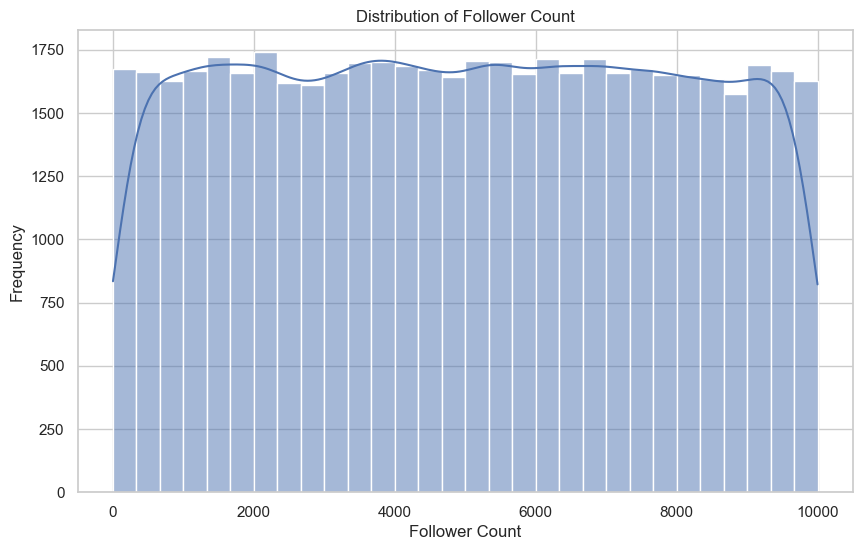

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your dataset

# 1. Follower Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Follower Count'], bins=30, kde=True)
plt.title("Distribution of Follower Count")
plt.xlabel("Follower Count")
plt.ylabel("Frequency")
plt.show()

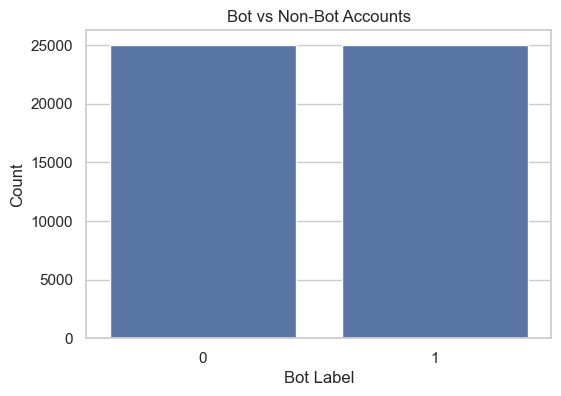

In [78]:
# 3. Bot Label Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Bot Label', data=data)
plt.title("Bot vs Non-Bot Accounts")
plt.xlabel("Bot Label")
plt.ylabel("Count")
plt.show()

In [79]:
import plotly.express as px

fig = px.scatter(data, x="Follower Count", y="Retweet Count",
                 color="Bot Label",  # Colors points by bot label (1 for bot, 0 for non-bot)
                 hover_data=['Username', 'Mention Count'],  # Additional info on hover
                 title="Retweet Count vs Follower Count by Bot Label")
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()


In [80]:
#Bot and Human Profile Behavior seems similar

### Words 

In [81]:
import plotly.express as px

# Count most frequent hashtags
top_hashtags = data['Hashtags'].value_counts().nlargest(10).reset_index()
top_hashtags.columns = ['Hashtag', 'Count']

# Interactive bar plot
fig = px.bar(top_hashtags, x='Count', y='Hashtag', orientation='h',
             title="Top 10 Most Frequent Hashtags", color='Count',
             color_continuous_scale='Viridis')
fig.update_layout(yaxis=dict(autorange="reversed"))  # Ensures most frequent is on top
fig.show()


In [82]:
import nltk
nltk.download('stopwords')

from collections import Counter
import plotly.express as px
from nltk.corpus import stopwords
import re

# Preprocess and count words
stop_words = set(stopwords.words('english'))
words = ' '.join(data['Tweet'].dropna()).lower()
words = re.findall(r'\b\w+\b', words)
words = [word for word in words if word not in stop_words and len(word) > 3]
word_freq = Counter(words).most_common(20)
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Count'])

# Interactive bar plot for word frequency
fig = px.bar(word_freq_df, x='Count', y='Word', orientation='h',
             title="Top 20 Words in Tweets", color='Count',
             color_continuous_scale='Plasma')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markushenriksson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
data['Created At'] = pd.to_datetime(data['Created At'], errors='coerce')


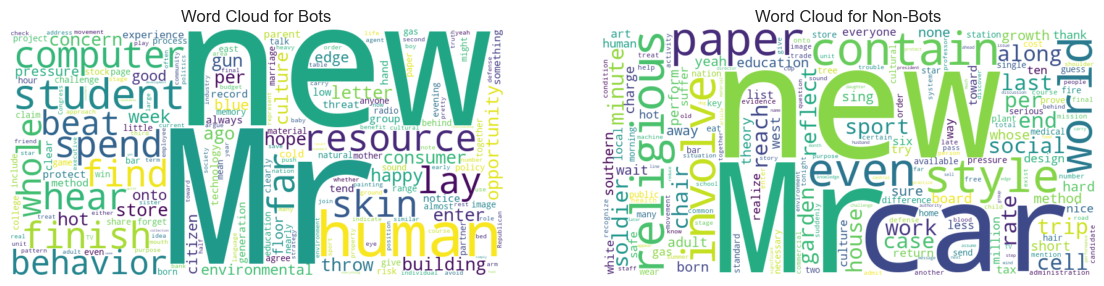

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate tweets by bot label
bot_tweets = ' '.join(data[data['Bot Label'] == 1]['Tweet'].dropna())
non_bot_tweets = ' '.join(data[data['Bot Label'] == 0]['Tweet'].dropna())

# Generate word clouds
bot_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bot_tweets)
non_bot_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_bot_tweets)

# Display word clouds side by side
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(bot_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Bots")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_bot_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Non-Bots")
plt.axis('off')
plt.show()


### Time

In [85]:
import plotly.express as px

# Extract hour from Created At
data['Hour'] = data['Created At'].dt.hour

# Group by Bot Label and Hour to get tweet counts
hour_activity = data.groupby(['Bot Label', 'Hour']).size().reset_index(name='Tweet Count')

# Heatmap
fig = px.density_heatmap(hour_activity, x='Hour', y='Bot Label', z='Tweet Count',
                         color_continuous_scale='Inferno', title="Hourly Tweet Activity by Bot Label")
fig.show()


In [86]:
# Calculate average engagement metrics over time by bot label
engagement_over_time = data.groupby([data['Created At'].dt.to_period('M'), 'Bot Label'])\
                           .agg(AvgRetweets=('Retweet Count', 'mean'),
                                AvgMentions=('Mention Count', 'mean')).reset_index()
engagement_over_time['Created At'] = engagement_over_time['Created At'].dt.to_timestamp()

# Line plot
fig = px.line(engagement_over_time, x='Created At', y='AvgRetweets', color='Bot Label',
              title="Average Retweet Count Over Time by Bot Label", markers=True)
fig.show()
